In [1]:
import numpy as np      # linear algebra
import pandas as pd     # data processing
from matplotlib import pyplot as plt
import re
from string import punctuation, digits
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Bidirectional
from keras.layers import LSTM

In [2]:
dataset = pd.read_csv('TurkishSMSCollection.csv',encoding='utf-8',sep=";")
print(dataset.shape)
pd.set_option('max_colwidth', 800)
dataset

(4751, 2)


,GroupText,Message
0,Normal,125 lira
1,Normal,Baskanin aksam toplantısi fenaymis :)
2,Normal,Bilal yalçnlara ne zaman gidiyoruz?
3,Spam,"BiP ile mesajlarimi aninda, daha eglenceli gonderiyorum! Sen de hemen kullan! http://mobiltr.co/BiP"
4,Spam,DIGITURKTEN FIRSAT! SiZE OZEL YIL SONUNA KADAR 200 UZERi ULUSAL HD YAYIN BELGESEL+SPOR+DiZi+YETiSKiN iLK AY LiG TV AYDA SADECE 10 TL.HEMEN ARAYIN 02122129070
...,...,...
4746,Spam,"Ziraat Kartiniza ozel, Lezzetlihediye.com dan yapacaginiz 75 TL ve uzeri harcamaniza aninda %25 indirim! Detayli bilgi icin http://bit.ly/1nQCDJy SMS istemiyorsaniz SMS IPTAL yazip 4757'ye gonderin.Mersis:6292228721472970"
4747,Spam,Ziraat Maximum'dan Yeniyila ozel 100 TL'ye kadar MaxiPuan! Kampanyaya katilmak icin YENIYIL bosluk kartinizin son 6 hanesini 4757'ye ucretsiz gonderebilirsiniz. Kampanya detayi icin http://bit.ly/1Y8ep8G linkini tiklayin.
4748,Normal,Zor olur sonra. Evet evet boş bol yürüyüş
4749,Spam,"Zorlu hava şartlarında elektriksiz kalma! Attlas Firman 3800 4 Zamanlı 3,8 KVA Jeneratör %10 indirimli, üstelik süper hızlı gönderi! http://bit.ly/1IxBp9g"


In [3]:
dataset.rename(columns= {'GroupText':'label','Message':'message'},inplace=True)
dataset

,label,message
0,Normal,125 lira
1,Normal,Baskanin aksam toplantısi fenaymis :)
2,Normal,Bilal yalçnlara ne zaman gidiyoruz?
3,Spam,"BiP ile mesajlarimi aninda, daha eglenceli gonderiyorum! Sen de hemen kullan! http://mobiltr.co/BiP"
4,Spam,DIGITURKTEN FIRSAT! SiZE OZEL YIL SONUNA KADAR 200 UZERi ULUSAL HD YAYIN BELGESEL+SPOR+DiZi+YETiSKiN iLK AY LiG TV AYDA SADECE 10 TL.HEMEN ARAYIN 02122129070
...,...,...
4746,Spam,"Ziraat Kartiniza ozel, Lezzetlihediye.com dan yapacaginiz 75 TL ve uzeri harcamaniza aninda %25 indirim! Detayli bilgi icin http://bit.ly/1nQCDJy SMS istemiyorsaniz SMS IPTAL yazip 4757'ye gonderin.Mersis:6292228721472970"
4747,Spam,Ziraat Maximum'dan Yeniyila ozel 100 TL'ye kadar MaxiPuan! Kampanyaya katilmak icin YENIYIL bosluk kartinizin son 6 hanesini 4757'ye ucretsiz gonderebilirsiniz. Kampanya detayi icin http://bit.ly/1Y8ep8G linkini tiklayin.
4748,Normal,Zor olur sonra. Evet evet boş bol yürüyüş
4749,Spam,"Zorlu hava şartlarında elektriksiz kalma! Attlas Firman 3800 4 Zamanlı 3,8 KVA Jeneratör %10 indirimli, üstelik süper hızlı gönderi! http://bit.ly/1IxBp9g"


In [4]:
dataset.label.value_counts()

Spam      2536
Normal    2215
Name: label, dtype: int64

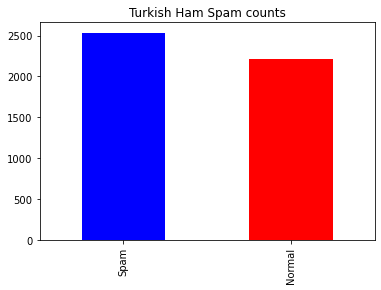

In [5]:
dataset.label.value_counts().plot(kind = 'bar', color = ['blue','red'])
plt.title('Turkish Ham Spam counts')
plt.show()

<AxesSubplot:ylabel='label'>

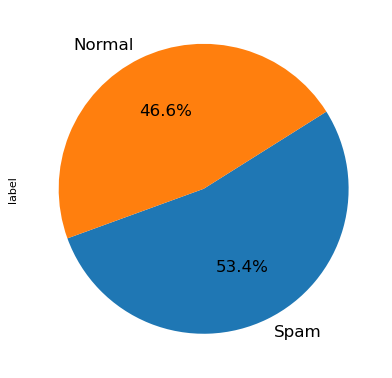

In [6]:
fig = plt.figure(figsize=(6,6), dpi=80)
ax = plt.subplot(111)

dataset.label.value_counts().plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=200, fontsize=15)

In [7]:
dataset['label'] = dataset['label'].map( {'Normal': 'Ham', 'Spam': 'Spam'} )
dataset

,label,message
0,Ham,125 lira
1,Ham,Baskanin aksam toplantısi fenaymis :)
2,Ham,Bilal yalçnlara ne zaman gidiyoruz?
3,Spam,"BiP ile mesajlarimi aninda, daha eglenceli gonderiyorum! Sen de hemen kullan! http://mobiltr.co/BiP"
4,Spam,DIGITURKTEN FIRSAT! SiZE OZEL YIL SONUNA KADAR 200 UZERi ULUSAL HD YAYIN BELGESEL+SPOR+DiZi+YETiSKiN iLK AY LiG TV AYDA SADECE 10 TL.HEMEN ARAYIN 02122129070
...,...,...
4746,Spam,"Ziraat Kartiniza ozel, Lezzetlihediye.com dan yapacaginiz 75 TL ve uzeri harcamaniza aninda %25 indirim! Detayli bilgi icin http://bit.ly/1nQCDJy SMS istemiyorsaniz SMS IPTAL yazip 4757'ye gonderin.Mersis:6292228721472970"
4747,Spam,Ziraat Maximum'dan Yeniyila ozel 100 TL'ye kadar MaxiPuan! Kampanyaya katilmak icin YENIYIL bosluk kartinizin son 6 hanesini 4757'ye ucretsiz gonderebilirsiniz. Kampanya detayi icin http://bit.ly/1Y8ep8G linkini tiklayin.
4748,Ham,Zor olur sonra. Evet evet boş bol yürüyüş
4749,Spam,"Zorlu hava şartlarında elektriksiz kalma! Attlas Firman 3800 4 Zamanlı 3,8 KVA Jeneratör %10 indirimli, üstelik süper hızlı gönderi! http://bit.ly/1IxBp9g"


# SECOND PREPROCESSING

In [7]:
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords

from nltk.tokenize import word_tokenize 

data = []

for i in range(dataset.shape[0]):
    sms = dataset.iloc[i, 1]
    
    # remove non alphabatic characters
    sms = re.sub('[^A-Za-z]', ' ', sms)
    
    # make words lowercase
    sms = sms.lower()
    
    #split message data into words 
    tokenized_sms = word_tokenize(sms) 
    
    # remove stop words and stemming
    sms_processed = []
    for word in tokenized_sms:
        if word not in set(stopwords.words('Turkish')):
            sms_processed.append(word)
    
    
    sms_text = " ".join(sms_processed)
    data.append(sms_text)

data

[nltk_data] Downloading package stopwords to C:\Users\Fehmi
[nltk_data]     Çakmak\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['lira',
 'baskanin aksam toplant si fenaymis',
 'bilal yal nlara zaman gidiyoruz',
 'bip mesajlarimi aninda eglenceli gonderiyorum sen hemen kullan http mobiltr co bip',
 'digiturkten firsat size ozel yil sonuna kadar uzeri ulusal hd yayin belgesel spor dizi yetiskin ilk ay lig tv ayda sadece tl hemen arayin',
 'yi dokuz eyl l iyidir ar g r falan kovala',
 'yiyim te ekk rler oturuyoruz nazarda arkada la sen nas ls n ge g rd m seni gelemedim yan n za',
 'kapatam yorun ayarlara girmem laz m',
 'men ye girsem g r n r m',
 'nemli il hocam iyi ak amlar',
 'senin nasil arastirma g revlisi olacak mi',
 'tamam',
 'tamam abi iyi yolculuklar ben hastanede yim bo a karsan g r ruz abi',
 'tamam getircektim att m antaya',
 'tamam hocam',
 'tamam uyar yarn gidelim',
 'tamamdir',
 'pamuk penye percale saten carsaf carsaf takimlarinda indirim agustos son sms iptal a mc mersis madamecoco com',
 'pamuk saten carsafli nevresim takimlari cift k tl tek k tl firsatiyla magazalar madamecoco com iptal a mc y

In [8]:
# creating the feature matrix 
from sklearn.feature_extraction.text import CountVectorizer

matrix = CountVectorizer(max_features=50)
X = matrix.fit_transform(data).toarray()
y = dataset['label'].map( {'Spam': 1, 'Ham': 0})

In [9]:
# split train and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [10]:
# K-Neighbors Classifier
kneighbors = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
kneighbors.fit(X_train, y_train)

print("Training Accuracy:", kneighbors.score(X_train, y_train))

predict_knn = kneighbors.predict(X_test)

print('\nTesting Accuracy:', accuracy_score(y_test, predict_knn))
print('Precision score: ', precision_score(y_test, predict_knn, average='weighted'))
print('Recall score:    ', recall_score(y_test, predict_knn, average='weighted'))
print('F1 score:        ', f1_score(y_test, predict_knn, average='weighted'))

Training Accuracy: 0.9723684210526315

Testing Accuracy: 0.9652996845425867
Precision score:  0.9667965417864853
Recall score:     0.9652996845425867
F1 score:         0.9653789286879616


In [11]:
#cross validation for KNN
fbeta_scorer = make_scorer(fbeta_score, beta = 0.5)

def validation_score(model_name):
    scores = cross_val_score(model_name, X_train, y_train, cv=10, scoring=fbeta_scorer) 
    return scores

kneighbors_val_score = validation_score(kneighbors)
print(kneighbors_val_score, "\n")
print("Average cross-validation F-beta score:", kneighbors_val_score.mean())

[0.98214286 0.97623967 0.98175966 0.96864502 0.9807074  0.98635887
 0.97837838 0.96933187 0.9807074  0.98635887] 

Average cross-validation F-beta score: 0.9790629975808753


In [12]:
# Random Forest
randFor = RandomForestClassifier()
randFor.fit(X_train, y_train)

print("Training Accuracy:", randFor.score(X_train, y_train))

predict_rf = randFor.predict(X_test)

print('\nTesting Accuracy:', accuracy_score(y_test, predict_rf))
print('Precision score: ', precision_score(y_test, predict_rf, average='weighted'))
print('Recall score:    ', recall_score(y_test, predict_rf, average='weighted'))
print('F1 score:        ', f1_score(y_test, predict_rf, average='weighted'))

Training Accuracy: 0.9886842105263158

Testing Accuracy: 0.982124079915878
Precision score:  0.9821305205894776
Recall score:     0.982124079915878
F1 score:         0.9821262014136178


In [13]:
#cross validation for Random Forest
randFor_val_score = validation_score(randFor)
print(randFor_val_score, "\n")
print("Average cross-validation F-beta score:", randFor_val_score.mean())

[0.98178138 0.985      0.98684211 0.98555212 0.99492386 0.999001
 0.98901099 0.97969543 0.99388379 0.98984772] 

Average cross-validation F-beta score: 0.9885538382501512


In [14]:
# Logistic Regression
logReg = LogisticRegression()
logReg.fit(X_train, y_train)

print("Training Accuracy:", logReg.score(X_train, y_train))

predict_lg = logReg.predict(X_test)

print('\nTesting Accuracy:', accuracy_score(y_test, predict_lg))
print('Precision score: ', precision_score(y_test, predict_lg, average='weighted'))
print('Recall score:    ', recall_score(y_test, predict_lg, average='weighted'))
print('F1 score:        ', f1_score(y_test, predict_lg, average='weighted'))

Training Accuracy: 0.9826315789473684

Testing Accuracy: 0.9737118822292324
Precision score:  0.9740364102819571
Recall score:     0.9737118822292324
F1 score:         0.9737428928609632


In [15]:
#cross validation for Logistic Regression
logReg_val_score = validation_score(logReg)
print(logReg_val_score, "\n")
print("Average cross-validation F-beta score:", logReg_val_score.mean())

[0.98577236 0.98393574 0.97782258 0.98223615 0.99388379 0.99697885
 0.98878695 0.98369011 0.99388379 0.99177801] 

Average cross-validation F-beta score: 0.9878768342438857


In [16]:
#fitting a Multinomial Naive Bayes Classifier Model 
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)

print("Training Accuracy:", naive_bayes.score(X_train, y_train))

predict_nb = naive_bayes.predict(X_test)

print('\nTesting Accuracy:', accuracy_score(y_test, predict_nb))
print('Precision score: ', precision_score(y_test, predict_nb, average='weighted'))
print('Recall score:    ', recall_score(y_test, predict_nb, average='weighted'))
print('F1 score:        ', f1_score(y_test, predict_nb, average='weighted'))

Training Accuracy: 0.645

Testing Accuracy: 0.6624605678233438
Precision score:  0.7640606266229781
Recall score:     0.6624605678233438
F1 score:         0.6039335635726379


In [17]:
#cross validation for Naive Bayes
naive_bayes_val_score = validation_score(naive_bayes)
print(naive_bayes_val_score, "\n")
print("Average cross-validation F-beta score:", naive_bayes_val_score.mean())

[0.64632546 0.65806878 0.6547619  0.65335139 0.64590164 0.65919578
 0.63747585 0.66509115 0.64892927 0.63254927] 

Average cross-validation F-beta score: 0.6501650499023547


In [18]:
#Support Vector Machine with linear kernel
svc = SVC(kernel = 'linear', C = 1.0)
svc.fit(X_train, y_train)

print("Training Accuracy:", svc.score(X_train, y_train))

predict_svm = svc.predict(X_test)

print('\nTesting Accuracy:', accuracy_score(y_test, predict_svm))
print('Precision score: ', precision_score(y_test, predict_svm, average='weighted'))
print('Recall score:    ', recall_score(y_test, predict_svm, average='weighted'))
print('F1 score:        ', f1_score(y_test, predict_svm, average='weighted'))

Training Accuracy: 0.9847368421052631

Testing Accuracy: 0.982124079915878
Precision score:  0.9821219545286841
Recall score:     0.982124079915878
F1 score:         0.9821219173535902


In [19]:
#cross validation for Support Vector Machine
svc_val_score = validation_score(svc)
print(svc_val_score, "\n")
print("Average cross-validation F-beta score:", svc_val_score.mean())

[0.98178138 0.985      0.975      0.9825998  0.99388379 0.99799398
 0.98716683 0.97902098 0.99388379 0.98690836] 

Average cross-validation F-beta score: 0.9863238906578642


In [20]:
# Decision Tree Classifier
dtc = DecisionTreeClassifier(max_depth=5)
dtc.fit(X_train, y_train)

print("Training Accuracy:", dtc.score(X_train, y_train))

predict_dtc = dtc.predict(X_test)

print('\nTesting Accuracy:', accuracy_score(y_test, predict_dtc))
print('Precision score: ', precision_score(y_test, predict_dtc, average='weighted'))
print('Recall score:    ', recall_score(y_test, predict_dtc, average='weighted'))
print('F1 score:        ', f1_score(y_test, predict_dtc, average='weighted'))

Training Accuracy: 0.9581578947368421

Testing Accuracy: 0.9463722397476341
Precision score:  0.9495482841160653
Recall score:     0.9463722397476341
F1 score:         0.9465266541385615


In [21]:
#cross validation for Decision Tree
dtc_val_score = validation_score(dtc)
print(dtc_val_score, "\n")
print("Average cross-validation F-beta score:", dtc_val_score.mean())

[0.97803347 0.97848361 0.96398305 0.97768332 0.98299681 0.98855359
 0.97927461 0.97178683 0.9795479  0.97883598] 

Average cross-validation F-beta score: 0.9779179172802026


In [22]:
#Ada Boost Classifier
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
abc.fit(X_train, y_train)

print("Training Accuracy:", abc.score(X_train, y_train))

predict_abc = abc.predict(X_test)

print('\nTesting Accuracy:', accuracy_score(y_test, predict_abc))
print('Precision score: ', precision_score(y_test, predict_abc, average='weighted'))
print('Recall score:    ', recall_score(y_test, predict_abc, average='weighted'))
print('F1 score:        ', f1_score(y_test, predict_abc, average='weighted'))

Training Accuracy: 0.9852631578947368

Testing Accuracy: 0.9842271293375394
Precision score:  0.9842330756611916
Recall score:     0.9842271293375394
F1 score:         0.98422900124731


In [23]:
#cross validation for Ada Boost Classifier
abc_val_score = validation_score(abc)
print(abc_val_score, "\n")
print("Average cross-validation F-beta score:", abc_val_score.mean())

[0.9828629  0.97718254 0.97718254 0.9779338  0.99194361 0.999001
 0.98612488 0.97573306 0.99388379 0.98690836] 

Average cross-validation F-beta score: 0.9848756478606923


In [24]:
# XGBoost Classifier
xgb = XGBClassifier(n_estimators=50,random_state=2, use_label_encoder=False, eval_metric='rmse')
xgb.fit(X_train, y_train)

print("Training Accuracy:", xgb.score(X_train, y_train))

predict_xgb = xgb.predict(X_test)

print('\nTesting Accuracy:', accuracy_score(y_test, predict_xgb))
print('Precision score: ', precision_score(y_test, predict_xgb, average='weighted'))
print('Recall score:    ', recall_score(y_test, predict_xgb, average='weighted'))
print('F1 score:        ', f1_score(y_test, predict_xgb, average='weighted'))

Training Accuracy: 0.9852631578947368

Testing Accuracy: 0.9779179810725552
Precision score:  0.977997780175072
Recall score:     0.9779179810725552
F1 score:         0.9779305782397191


In [25]:
#cross validation for XGBoost Classifier
xgb_val_score = validation_score(xgb)
print(xgb_val_score, "\n")
print("Average cross-validation F-beta score:", xgb_val_score.mean())

[0.9828629  0.985      0.97891566 0.9825998  0.99492386 0.99799398
 0.98401598 0.98187311 0.99492386 0.98584429] 

Average cross-validation F-beta score: 0.9868953441807206


In [26]:
# Stochastic Gradient Descent Classifier
sgd = SGDClassifier()
sgd.fit(X_train, y_train)

print("Training Accuracy:", sgd.score(X_train, y_train))

predict_sgd = sgd.predict(X_test)

print('\nTesting Accuracy:', accuracy_score(y_test, predict_sgd))
print('Precision score: ', precision_score(y_test, predict_sgd, average='weighted'))
print('Recall score:    ', recall_score(y_test, predict_sgd, average='weighted'))
print('F1 score:        ', f1_score(y_test, predict_sgd, average='weighted'))

Training Accuracy: 0.9852631578947368

Testing Accuracy: 0.9810725552050473
Precision score:  0.9810725552050473
Recall score:     0.9810725552050473
F1 score:         0.9810725552050473


In [27]:
#cross validation for Stochastic Gradient Descent
sgd_val_score = validation_score(sgd)
print(sgd_val_score, "\n")
print("Average cross-validation F-beta score:", sgd_val_score.mean())

[0.9828629  0.985      0.97826087 0.98584429 0.99388379 0.99799398
 0.98716683 0.97902098 0.99388379 0.98690836] 

Average cross-validation F-beta score: 0.9870825794718485


In [28]:
#Initialising ANN
ann = Sequential()
 #Adding First Hidden Layer
ann.add(Dense(units=6,activation="relu"))
#Adding Second Hidden Layer
ann.add(Dense(units=6,activation="relu"))
#Adding Output Layer
ann.add(Dense(units=1,activation="sigmoid"))
#Compiling ANN
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])
#Fitting ANN
history = ann.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs = 50)

Epoch 1/50
119/119 [==============================] - 1s 2ms/step - loss: 0.6893 - accuracy: 0.4679 - val_loss: 0.6323 - val_accuracy: 0.6046
Epoch 2/50
119/119 [==============================] - 0s 1ms/step - loss: 0.4868 - accuracy: 0.9526 - val_loss: 0.3229 - val_accuracy: 0.9685
Epoch 3/50
119/119 [==============================] - 0s 1ms/step - loss: 0.2385 - accuracy: 0.9726 - val_loss: 0.1693 - val_accuracy: 0.9695
Epoch 4/50
119/119 [==============================] - 0s 1ms/step - loss: 0.1369 - accuracy: 0.9797 - val_loss: 0.1124 - val_accuracy: 0.9779
Epoch 5/50
119/119 [==============================] - 0s 1ms/step - loss: 0.0964 - accuracy: 0.9795 - val_loss: 0.0896 - val_accuracy: 0.9800
Epoch 6/50
119/119 [==============================] - 0s 1ms/step - loss: 0.0780 - accuracy: 0.9808 - val_loss: 0.0791 - val_accuracy: 0.9790
Epoch 7/50
119/119 [==============================] - 0s 1ms/step - loss: 0.0687 - accuracy: 0.9816 - val_loss: 0.0741 - val_accuracy: 0.9790
Epoch 

In [29]:
loss, accuracy = ann.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
print("Training Loss: {:.4f}".format(loss))

loss, accuracy = ann.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
print("Testing Loss:  {:.4f}".format(loss))

Training Accuracy: 0.9879
Training Loss: 0.0490
Testing Accuracy:  0.9853
Testing Loss:  0.0619


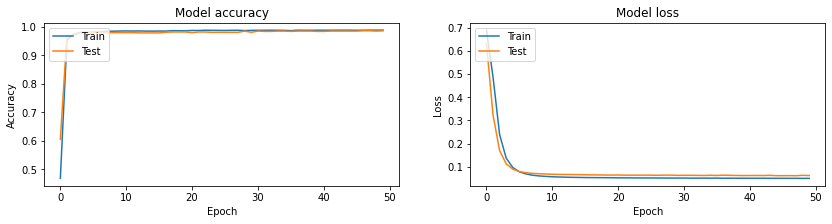

In [30]:
# Plot training & validation accuracy values

plt.figure(figsize=(14,3))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

In [31]:
# create the CNN model
cnn = Sequential()
cnn.add(Embedding(1000, 64, input_length=50))
cnn.add(Conv1D(filters=128, kernel_size=4, padding='same', activation='relu'))
cnn.add(MaxPooling1D(pool_size=2))
cnn.add(Conv1D(filters=64, kernel_size=4, padding='same', activation='relu'))
cnn.add(MaxPooling1D(pool_size=2))
cnn.add(Conv1D(filters=32, kernel_size=4, padding='same', activation='relu'))
cnn.add(MaxPooling1D(pool_size=2))
cnn.add(Flatten())
cnn.add(Dense(256, activation='relu'))
cnn.add(Dense(1, activation='sigmoid'))
cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 64)            64000     
                                                                 
 conv1d (Conv1D)             (None, 50, 128)           32896     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 25, 128)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 25, 64)            32832     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 12, 64)           0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 12, 32)           

In [32]:
# Fit the model
history = cnn.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
95/95 [==============================] - 2s 13ms/step - loss: 0.1958 - accuracy: 0.9398 - val_loss: 0.0908 - val_accuracy: 0.9724
Epoch 2/50
95/95 [==============================] - 1s 10ms/step - loss: 0.0794 - accuracy: 0.9760 - val_loss: 0.1285 - val_accuracy: 0.9592
Epoch 3/50
95/95 [==============================] - 1s 11ms/step - loss: 0.0787 - accuracy: 0.9780 - val_loss: 0.0898 - val_accuracy: 0.9697
Epoch 4/50
95/95 [==============================] - 1s 10ms/step - loss: 0.0728 - accuracy: 0.9780 - val_loss: 0.1113 - val_accuracy: 0.9724
Epoch 5/50
95/95 [==============================] - 1s 10ms/step - loss: 0.0719 - accuracy: 0.9780 - val_loss: 0.0790 - val_accuracy: 0.9776
Epoch 6/50
95/95 [==============================] - 1s 10ms/step - loss: 0.0657 - accuracy: 0.9816 - val_loss: 0.1072 - val_accuracy: 0.9658
Epoch 7/50
95/95 [==============================] - 1s 10ms/step - loss: 0.0641 - accuracy: 0.9806 - val_loss: 0.0809 - val_accuracy: 0.9789
Epoch 8/50
95

In [33]:
loss, accuracy = cnn.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
print("Training Loss: {:.4f}".format(loss))

loss, accuracy = cnn.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
print("Testing Loss:  {:.4f}".format(loss))

Training Accuracy: 0.9882
Training Loss: 0.0468
Testing Accuracy:  0.9832
Testing Loss:  0.0744


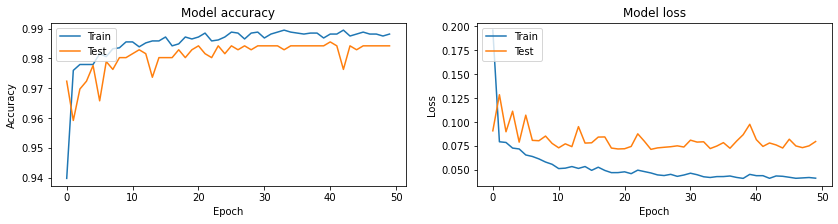

In [34]:
# Plot training & validation accuracy values
plt.figure(figsize=(14,3))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

In [35]:
# Create the LSTM Model
model = Sequential()
model.add(Embedding(input_dim=1000, output_dim=64, input_length=50))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 50, 64)            64000     
                                                                 
 lstm (LSTM)                 (None, 100)               66000     
                                                                 
 dense_5 (Dense)             (None, 1)                 101       
                                                                 
Total params: 130,101
Trainable params: 130,101
Non-trainable params: 0
_________________________________________________________________


In [36]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
95/95 [==============================] - 3s 20ms/step - loss: 0.3546 - accuracy: 0.8391 - val_loss: 0.1438 - val_accuracy: 0.9513
Epoch 2/50
95/95 [==============================] - 2s 16ms/step - loss: 0.1738 - accuracy: 0.9418 - val_loss: 0.1916 - val_accuracy: 0.9487
Epoch 3/50
95/95 [==============================] - 2s 18ms/step - loss: 0.1311 - accuracy: 0.9592 - val_loss: 0.1276 - val_accuracy: 0.9632
Epoch 4/50
95/95 [==============================] - 2s 17ms/step - loss: 0.1147 - accuracy: 0.9595 - val_loss: 0.1279 - val_accuracy: 0.9632
Epoch 5/50
95/95 [==============================] - 2s 17ms/step - loss: 0.1166 - accuracy: 0.9645 - val_loss: 0.1076 - val_accuracy: 0.9697
Epoch 6/50
95/95 [==============================] - 2s 17ms/step - loss: 0.1049 - accuracy: 0.9632 - val_loss: 0.1080 - val_accuracy: 0.9645
Epoch 7/50
95/95 [==============================] - 2s 20ms/step - loss: 0.1013 - accuracy: 0.9678 - val_loss: 0.1053 - val_accuracy: 0.9697
Epoch 8/50
95

In [37]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
print("Training Loss: {:.4f}".format(loss))

loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
print("Testing Loss:  {:.4f}".format(loss))

Training Accuracy: 0.9816
Training Loss: 0.0679
Testing Accuracy:  0.9779
Testing Loss:  0.0824


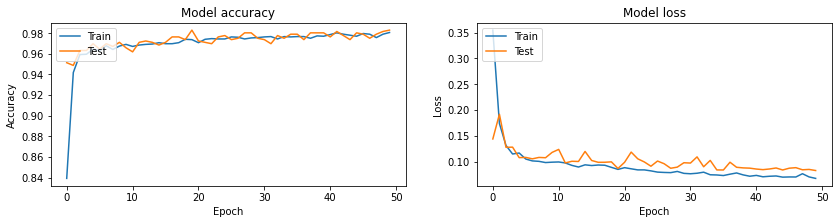

In [38]:
# Plot training & validation accuracy values

plt.figure(figsize=(14,3))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

# FIRST PREPROCESSING

In [8]:
# Transform message into lower case
dataset["lowerCaseMessage"] = dataset["message"].str.lower()
dataset

,label,message,lowerCaseMessage
0,Ham,125 lira,125 lira
1,Ham,Baskanin aksam toplantısi fenaymis :),baskanin aksam toplantısi fenaymis :)
2,Ham,Bilal yalçnlara ne zaman gidiyoruz?,bilal yalçnlara ne zaman gidiyoruz?
3,Spam,"BiP ile mesajlarimi aninda, daha eglenceli gonderiyorum! Sen de hemen kullan! http://mobiltr.co/BiP","bip ile mesajlarimi aninda, daha eglenceli gonderiyorum! sen de hemen kullan! http://mobiltr.co/bip"
4,Spam,DIGITURKTEN FIRSAT! SiZE OZEL YIL SONUNA KADAR 200 UZERi ULUSAL HD YAYIN BELGESEL+SPOR+DiZi+YETiSKiN iLK AY LiG TV AYDA SADECE 10 TL.HEMEN ARAYIN 02122129070,digiturkten firsat! size ozel yil sonuna kadar 200 uzeri ulusal hd yayin belgesel+spor+dizi+yetiskin ilk ay lig tv ayda sadece 10 tl.hemen arayin 02122129070
...,...,...,...
4746,Spam,"Ziraat Kartiniza ozel, Lezzetlihediye.com dan yapacaginiz 75 TL ve uzeri harcamaniza aninda %25 indirim! Detayli bilgi icin http://bit.ly/1nQCDJy SMS istemiyorsaniz SMS IPTAL yazip 4757'ye gonderin.Mersis:6292228721472970","ziraat kartiniza ozel, lezzetlihediye.com dan yapacaginiz 75 tl ve uzeri harcamaniza aninda %25 indirim! detayli bilgi icin http://bit.ly/1nqcdjy sms istemiyorsaniz sms iptal yazip 4757'ye gonderin.mersis:6292228721472970"
4747,Spam,Ziraat Maximum'dan Yeniyila ozel 100 TL'ye kadar MaxiPuan! Kampanyaya katilmak icin YENIYIL bosluk kartinizin son 6 hanesini 4757'ye ucretsiz gonderebilirsiniz. Kampanya detayi icin http://bit.ly/1Y8ep8G linkini tiklayin.,ziraat maximum'dan yeniyila ozel 100 tl'ye kadar maxipuan! kampanyaya katilmak icin yeniyil bosluk kartinizin son 6 hanesini 4757'ye ucretsiz gonderebilirsiniz. kampanya detayi icin http://bit.ly/1y8ep8g linkini tiklayin.
4748,Ham,Zor olur sonra. Evet evet boş bol yürüyüş,zor olur sonra. evet evet boş bol yürüyüş
4749,Spam,"Zorlu hava şartlarında elektriksiz kalma! Attlas Firman 3800 4 Zamanlı 3,8 KVA Jeneratör %10 indirimli, üstelik süper hızlı gönderi! http://bit.ly/1IxBp9g","zorlu hava şartlarında elektriksiz kalma! attlas firman 3800 4 zamanlı 3,8 kva jeneratör %10 indirimli, üstelik süper hızlı gönderi! http://bit.ly/1ixbp9g"


In [9]:
# Remove http, www, .com, email adress, link, punctuation and digit

def preProcessing(text):
    return removePunc(removeDigits(removeEmail(remove_com_tr(removeLink(text)))))

def removeLink(text):
    return re.sub(r"((http\S+)|(www\S+))", "", str(text))

def remove_com_tr(text):
    text = re.sub(r'\S*\.(com|tr)',"",str(text))
    return text

def removeEmail(text):
    return re.sub(r'([.\w]{3,}@[.\w]{5,})', '', str(text))

def removeDigits(text):
    text = text.strip()  #removing whitespaces from text
    remove_digits = str.maketrans('', '', digits)
    return text.translate(remove_digits)

def removePunc(text):
    regex = re.compile('[%s]' % re.escape(punctuation))
    return regex.sub('', text)

In [10]:
dataset["cleanedMessage"] = dataset['lowerCaseMessage'].map(preProcessing)
dataset

,label,message,lowerCaseMessage,cleanedMessage
0,Ham,125 lira,125 lira,lira
1,Ham,Baskanin aksam toplantısi fenaymis :),baskanin aksam toplantısi fenaymis :),baskanin aksam toplantısi fenaymis
2,Ham,Bilal yalçnlara ne zaman gidiyoruz?,bilal yalçnlara ne zaman gidiyoruz?,bilal yalçnlara ne zaman gidiyoruz
3,Spam,"BiP ile mesajlarimi aninda, daha eglenceli gonderiyorum! Sen de hemen kullan! http://mobiltr.co/BiP","bip ile mesajlarimi aninda, daha eglenceli gonderiyorum! sen de hemen kullan! http://mobiltr.co/bip",bip ile mesajlarimi aninda daha eglenceli gonderiyorum sen de hemen kullan
4,Spam,DIGITURKTEN FIRSAT! SiZE OZEL YIL SONUNA KADAR 200 UZERi ULUSAL HD YAYIN BELGESEL+SPOR+DiZi+YETiSKiN iLK AY LiG TV AYDA SADECE 10 TL.HEMEN ARAYIN 02122129070,digiturkten firsat! size ozel yil sonuna kadar 200 uzeri ulusal hd yayin belgesel+spor+dizi+yetiskin ilk ay lig tv ayda sadece 10 tl.hemen arayin 02122129070,digiturkten firsat size ozel yil sonuna kadar uzeri ulusal hd yayin belgeselspordiziyetiskin ilk ay lig tv ayda sadece tlhemen arayin
...,...,...,...,...
4746,Spam,"Ziraat Kartiniza ozel, Lezzetlihediye.com dan yapacaginiz 75 TL ve uzeri harcamaniza aninda %25 indirim! Detayli bilgi icin http://bit.ly/1nQCDJy SMS istemiyorsaniz SMS IPTAL yazip 4757'ye gonderin.Mersis:6292228721472970","ziraat kartiniza ozel, lezzetlihediye.com dan yapacaginiz 75 tl ve uzeri harcamaniza aninda %25 indirim! detayli bilgi icin http://bit.ly/1nqcdjy sms istemiyorsaniz sms iptal yazip 4757'ye gonderin.mersis:6292228721472970",ziraat kartiniza ozel dan yapacaginiz tl ve uzeri harcamaniza aninda indirim detayli bilgi icin sms istemiyorsaniz sms iptal yazip ye gonderinmersis
4747,Spam,Ziraat Maximum'dan Yeniyila ozel 100 TL'ye kadar MaxiPuan! Kampanyaya katilmak icin YENIYIL bosluk kartinizin son 6 hanesini 4757'ye ucretsiz gonderebilirsiniz. Kampanya detayi icin http://bit.ly/1Y8ep8G linkini tiklayin.,ziraat maximum'dan yeniyila ozel 100 tl'ye kadar maxipuan! kampanyaya katilmak icin yeniyil bosluk kartinizin son 6 hanesini 4757'ye ucretsiz gonderebilirsiniz. kampanya detayi icin http://bit.ly/1y8ep8g linkini tiklayin.,ziraat maximumdan yeniyila ozel tlye kadar maxipuan kampanyaya katilmak icin yeniyil bosluk kartinizin son hanesini ye ucretsiz gonderebilirsiniz kampanya detayi icin linkini tiklayin
4748,Ham,Zor olur sonra. Evet evet boş bol yürüyüş,zor olur sonra. evet evet boş bol yürüyüş,zor olur sonra evet evet boş bol yürüyüş
4749,Spam,"Zorlu hava şartlarında elektriksiz kalma! Attlas Firman 3800 4 Zamanlı 3,8 KVA Jeneratör %10 indirimli, üstelik süper hızlı gönderi! http://bit.ly/1IxBp9g","zorlu hava şartlarında elektriksiz kalma! attlas firman 3800 4 zamanlı 3,8 kva jeneratör %10 indirimli, üstelik süper hızlı gönderi! http://bit.ly/1ixbp9g",zorlu hava şartlarında elektriksiz kalma attlas firman zamanlı kva jeneratör indirimli üstelik süper hızlı gönderi


In [11]:
#Create Train Test Split
X = dataset["cleanedMessage"]

y = dataset['label'].map( {'Spam': 1, 'Ham': 0} )

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

vectorizer = CountVectorizer()
vectorizer.fit(X_train)

X_train = vectorizer.transform(X_train)
X_test  = vectorizer.transform(X_test)

In [13]:
# K-Neighbors Classifier
kneighbors = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
kneighbors.fit(X_train, y_train)

print("Training Accuracy:", kneighbors.score(X_train, y_train))

predict_knn = kneighbors.predict(X_test)

print('\nTesting Accuracy:', accuracy_score(y_test, predict_knn))
print('Precision score: ', precision_score(y_test, predict_knn, average='weighted'))
print('Recall score:    ', recall_score(y_test, predict_knn, average='weighted'))
print('F1 score:        ', f1_score(y_test, predict_knn, average='weighted'))

Training Accuracy: 0.733421052631579

Testing Accuracy: 0.6635120925341745
Precision score:  0.7474344130626712
Recall score:     0.6635120925341745
F1 score:         0.610163645300748


In [14]:
#cross validation for KNN
fbeta_scorer = make_scorer(fbeta_score, beta = 0.5)

def validation_score(model_name):
    scores = cross_val_score(model_name, X_train, y_train, cv=10, scoring=fbeta_scorer) 
    return scores

kneighbors_val_score = validation_score(kneighbors)
print(kneighbors_val_score, "\n")
print("Average cross-validation F-beta score:", kneighbors_val_score.mean())

[0.63822751 0.64127604 0.65202703 0.64451827 0.63941991 0.63420884
 0.65464262 0.65102445 0.65158677 0.65304756] 

Average cross-validation F-beta score: 0.6459978996798822


In [15]:
# Random Forest
randFor = RandomForestClassifier()
randFor.fit(X_train, y_train)

print("Training Accuracy:", randFor.score(X_train, y_train))

predict_rf = randFor.predict(X_test)

print('\nTesting Accuracy:', accuracy_score(y_test, predict_rf))
print('Precision score: ', precision_score(y_test, predict_rf, average='weighted'))
print('Recall score:    ', recall_score(y_test, predict_rf, average='weighted'))
print('F1 score:        ', f1_score(y_test, predict_rf, average='weighted'))

Training Accuracy: 0.9994736842105263

Testing Accuracy: 0.9316508937960042
Precision score:  0.9360018252881773
Recall score:     0.9316508937960042
F1 score:         0.9310246327928944


In [16]:
#cross validation for Random Forest
randFor_val_score = validation_score(randFor)
print(randFor_val_score, "\n")
print("Average cross-validation F-beta score:", randFor_val_score.mean())

[0.89154412 0.89928058 0.91789668 0.91769158 0.89790337 0.89652096
 0.8984726  0.88444444 0.90622182 0.8616188 ] 

Average cross-validation F-beta score: 0.8971594949803807


In [17]:
# Logistic Regression
logReg = LogisticRegression()
logReg.fit(X_train, y_train)

print("Training Accuracy:", logReg.score(X_train, y_train))

predict_lg = logReg.predict(X_test)

print('\nTesting Accuracy:', accuracy_score(y_test, predict_lg))
print('Precision score: ', precision_score(y_test, predict_lg, average='weighted'))
print('Recall score:    ', recall_score(y_test, predict_lg, average='weighted'))
print('F1 score:        ', f1_score(y_test, predict_lg, average='weighted'))

Training Accuracy: 0.9971052631578947

Testing Accuracy: 0.9747634069400631
Precision score:  0.9757275390656494
Recall score:     0.9747634069400631
F1 score:         0.9748123700367459


In [18]:
#cross validation for Logistic Regression
logReg_val_score = validation_score(logReg)
print(logReg_val_score, "\n")
print("Average cross-validation F-beta score:", logReg_val_score.mean())

[0.97510373 0.98684211 0.99696356 0.97409326 0.99071207 0.99697885
 0.99194361 0.9908999  0.99177801 0.99697885] 

Average cross-validation F-beta score: 0.9892293955226548


In [19]:
#fitting a Multinomial Naive Bayes Classifier Model 
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)

print("Training Accuracy:", naive_bayes.score(X_train, y_train))

predict_nb = naive_bayes.predict(X_test)

print('\nTesting Accuracy:', accuracy_score(y_test, predict_nb))
print('Precision score: ', precision_score(y_test, predict_nb, average='weighted'))
print('Recall score:    ', recall_score(y_test, predict_nb, average='weighted'))
print('F1 score:        ', f1_score(y_test, predict_nb, average='weighted'))

Training Accuracy: 0.9971052631578947

Testing Accuracy: 0.9747634069400631
Precision score:  0.9756712200930916
Recall score:     0.9747634069400631
F1 score:         0.9746827303482996


In [20]:
#cross validation for Naive Bayes
naive_bayes_val_score = validation_score(naive_bayes)
print(naive_bayes_val_score, "\n")
print("Average cross-validation F-beta score:", naive_bayes_val_score.mean())

[0.99085366 0.98710317 0.99103586 0.9800995  0.98796389 0.98820059
 0.98432909 0.999001   0.98716683 0.97836775] 

Average cross-validation F-beta score: 0.9874121341449584


In [21]:
#Support Vector Machine with linear kernel
svc = SVC(kernel = 'linear', C = 1.0)
svc.fit(X_train, y_train)

print("Training Accuracy:", svc.score(X_train, y_train))

predict_svm = svc.predict(X_test)

print('\nTesting Accuracy:', accuracy_score(y_test, predict_svm))
print('Precision score: ', precision_score(y_test, predict_svm, average='weighted'))
print('Recall score:    ', recall_score(y_test, predict_svm, average='weighted'))
print('F1 score:        ', f1_score(y_test, predict_svm, average='weighted'))

Training Accuracy: 0.9973684210526316

Testing Accuracy: 0.9831756046267087
Precision score:  0.9837901944120344
Recall score:     0.9831756046267087
F1 score:         0.9832029406081213


In [22]:
#cross validation for Support Vector Machine
svc_val_score = validation_score(svc)
print(svc_val_score, "\n")
print("Average cross-validation F-beta score:", svc_val_score.mean())

[0.98657025 0.98790323 0.99696356 0.98039216 0.99492386 0.99697885
 0.99297894 0.99492386 0.99492386 0.99799398] 

Average cross-validation F-beta score: 0.9924552537680194


In [23]:
# Decision Tree Classifier
dtc = DecisionTreeClassifier(max_depth=5)
dtc.fit(X_train, y_train)

print("Training Accuracy:", dtc.score(X_train, y_train))

predict_dtc = dtc.predict(X_test)

print('\nTesting Accuracy:', accuracy_score(y_test, predict_dtc))
print('Precision score: ', precision_score(y_test, predict_dtc, average='weighted'))
print('Recall score:    ', recall_score(y_test, predict_dtc, average='weighted'))
print('F1 score:        ', f1_score(y_test, predict_dtc, average='weighted'))

Training Accuracy: 0.9342105263157895

Testing Accuracy: 0.9148264984227129
Precision score:  0.9187396424741521
Recall score:     0.9148264984227129
F1 score:         0.9150825739470124


In [24]:
#cross validation for Decision Tree
dtc_val_score = validation_score(dtc)
print(dtc_val_score, "\n")
print("Average cross-validation F-beta score:", dtc_val_score.mean())

[0.94162996 0.95493562 0.96566524 0.95890411 0.95709571 0.96998928
 0.94594595 0.96825397 0.96584845 0.94855305] 

Average cross-validation F-beta score: 0.9576821336732919


In [25]:
#Ada Boost Classifier
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
abc.fit(X_train, y_train)

print("Training Accuracy:", abc.score(X_train, y_train))

predict_abc = abc.predict(X_test)

print('\nTesting Accuracy:', accuracy_score(y_test, predict_abc))
print('Precision score: ', precision_score(y_test, predict_abc, average='weighted'))
print('Recall score:    ', recall_score(y_test, predict_abc, average='weighted'))
print('F1 score:        ', f1_score(y_test, predict_abc, average='weighted'))

Training Accuracy: 0.9844736842105263

Testing Accuracy: 0.9663512092534174
Precision score:  0.9664744643121314
Recall score:     0.9663512092534174
F1 score:         0.9663740130637422


In [26]:
#cross validation for Ada Boost Classifier
abc_val_score = validation_score(abc)
print(abc_val_score, "\n")
print("Average cross-validation F-beta score:", abc_val_score.mean())

[0.96938776 0.97336066 0.98       0.96517413 0.97814776 0.99297894
 0.98294885 0.97902098 0.98878695 0.9779338 ] 

Average cross-validation F-beta score: 0.9787739818805065


In [27]:
# XGBoost Classifier
xgb = XGBClassifier(n_estimators=50,random_state=2, use_label_encoder=False, eval_metric='rmse')
xgb.fit(X_train, y_train)

print("Training Accuracy:", xgb.score(X_train, y_train))

predict_xgb = xgb.predict(X_test)

print('\nTesting Accuracy:', accuracy_score(y_test, predict_xgb))
print('Precision score: ', precision_score(y_test, predict_xgb, average='weighted'))
print('Recall score:    ', recall_score(y_test, predict_xgb, average='weighted'))
print('F1 score:        ', f1_score(y_test, predict_xgb, average='weighted'))

Training Accuracy: 0.9847368421052631

Testing Accuracy: 0.9674027339642481
Precision score:  0.9678556541307269
Recall score:     0.9674027339642481
F1 score:         0.9674472129904447


In [28]:
#cross validation for XGBoost Classifier
xgb_val_score = validation_score(xgb)
print(xgb_val_score, "\n")
print("Average cross-validation F-beta score:", xgb_val_score.mean())

[0.97222222 0.97672065 0.98577236 0.97178683 0.98223615 0.99400599
 0.96903097 0.98477157 0.99071207 0.97573306] 

Average cross-validation F-beta score: 0.9802991890869961


In [29]:
# Stochastic Gradient Descent Classifier
sgd = SGDClassifier()
sgd.fit(X_train, y_train)

print("Training Accuracy:", sgd.score(X_train, y_train))

predict_sgd = sgd.predict(X_test)

print('\nTesting Accuracy:', accuracy_score(y_test, predict_sgd))
print('Precision score: ', precision_score(y_test, predict_sgd, average='weighted'))
print('Recall score:    ', recall_score(y_test, predict_sgd, average='weighted'))
print('F1 score:        ', f1_score(y_test, predict_sgd, average='weighted'))

Training Accuracy: 0.9973684210526316

Testing Accuracy: 0.9831756046267087
Precision score:  0.9836534878129626
Recall score:     0.9831756046267087
F1 score:         0.9832000593449522


In [30]:
#cross validation for Stochastic Gradient Descent
sgd_val_score = validation_score(sgd)
print(sgd_val_score, "\n")
print("Average cross-validation F-beta score:", sgd_val_score.mean())

[0.97848361 0.98684211 1.         0.98294885 0.99595551 0.999001
 0.99297894 0.99297894 0.99799398 0.99799398] 

Average cross-validation F-beta score: 0.9925176905490476


In [12]:
#for fitting the model
X_train = X_train.toarray()
X_test = X_test.toarray()

In [77]:
#Initialising ANN
ann = Sequential()
 #Adding First Hidden Layer
ann.add(Dense(units=6,activation="relu"))
#Adding Second Hidden Layer
ann.add(Dense(units=6,activation="relu"))
#Adding Output Layer
ann.add(Dense(units=1,activation="sigmoid"))
#Compiling ANN
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])
#Fitting ANN
history = ann.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs = 50)

Epoch 1/50
119/119 [==============================] - 1s 4ms/step - loss: 0.5699 - accuracy: 0.9013 - val_loss: 0.3724 - val_accuracy: 0.9926
Epoch 2/50
119/119 [==============================] - 0s 3ms/step - loss: 0.2259 - accuracy: 0.9942 - val_loss: 0.1324 - val_accuracy: 0.9895
Epoch 3/50
119/119 [==============================] - 0s 4ms/step - loss: 0.0761 - accuracy: 0.9961 - val_loss: 0.0692 - val_accuracy: 0.9874
Epoch 4/50
119/119 [==============================] - 0s 3ms/step - loss: 0.0360 - accuracy: 0.9968 - val_loss: 0.0496 - val_accuracy: 0.9895
Epoch 5/50
119/119 [==============================] - 0s 3ms/step - loss: 0.0231 - accuracy: 0.9971 - val_loss: 0.0418 - val_accuracy: 0.9905
Epoch 6/50
119/119 [==============================] - 0s 3ms/step - loss: 0.0177 - accuracy: 0.9971 - val_loss: 0.0375 - val_accuracy: 0.9905
Epoch 7/50
119/119 [==============================] - 0s 3ms/step - loss: 0.0149 - accuracy: 0.9971 - val_loss: 0.0346 - val_accuracy: 0.9916
Epoch 

In [78]:
loss, accuracy = ann.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
print("Training Loss: {:.4f}".format(loss))

loss, accuracy = ann.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
print("Testing Loss:  {:.4f}".format(loss))

Training Accuracy: 0.9995
Training Loss: 0.0015
Testing Accuracy:  0.9632
Testing Loss:  0.0707


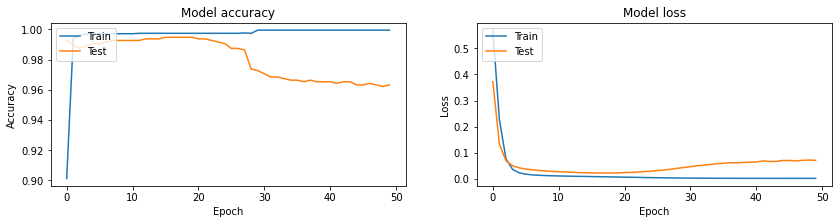

In [79]:
# Plot training & validation accuracy values

plt.figure(figsize=(14,3))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

In [88]:
# create the CNN model
cnn = Sequential()
cnn.add(Embedding(5000, 32, input_length=11005))
cnn.add(Conv1D(filters=128, kernel_size=4, padding='same', activation='relu'))
cnn.add(MaxPooling1D(pool_size=2))
cnn.add(Conv1D(filters=64, kernel_size=4, padding='same', activation='relu'))
cnn.add(MaxPooling1D(pool_size=2))
cnn.add(Conv1D(filters=32, kernel_size=4, padding='same', activation='relu'))
cnn.add(MaxPooling1D(pool_size=2))
cnn.add(Flatten())
cnn.add(Dense(256, activation='relu'))
cnn.add(Dense(1, activation='sigmoid'))
cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
cnn.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 11005, 32)         160000    
                                                                 
 conv1d_19 (Conv1D)          (None, 11005, 128)        16512     
                                                                 
 max_pooling1d_19 (MaxPoolin  (None, 5502, 128)        0         
 g1D)                                                            
                                                                 
 conv1d_20 (Conv1D)          (None, 5502, 64)          32832     
                                                                 
 max_pooling1d_20 (MaxPoolin  (None, 2751, 64)         0         
 g1D)                                                            
                                                                 
 conv1d_21 (Conv1D)          (None, 2751, 32)         

In [89]:
# Fit the model
history = cnn.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
95/95 [==============================] - 72s 754ms/step - loss: 0.3677 - accuracy: 0.7862 - val_loss: 0.0926 - val_accuracy: 0.9671
Epoch 2/50
95/95 [==============================] - 73s 772ms/step - loss: 0.0370 - accuracy: 0.9914 - val_loss: 0.0284 - val_accuracy: 0.9908
Epoch 3/50
95/95 [==============================] - 74s 782ms/step - loss: 0.0176 - accuracy: 0.9954 - val_loss: 0.0332 - val_accuracy: 0.9895
Epoch 4/50
95/95 [==============================] - 74s 774ms/step - loss: 0.0121 - accuracy: 0.9954 - val_loss: 0.0482 - val_accuracy: 0.9842
Epoch 5/50
95/95 [==============================] - 74s 774ms/step - loss: 0.0092 - accuracy: 0.9964 - val_loss: 0.0723 - val_accuracy: 0.9803
Epoch 6/50
95/95 [==============================] - 74s 780ms/step - loss: 0.0047 - accuracy: 0.9977 - val_loss: 0.1113 - val_accuracy: 0.9803
Epoch 7/50
95/95 [==============================] - 75s 786ms/step - loss: 0.0066 - accuracy: 0.9984 - val_loss: 0.1840 - val_accuracy: 0.9645

In [90]:
loss, accuracy = cnn.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
print("Training Loss: {:.4f}".format(loss))

loss, accuracy = cnn.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
print("Testing Loss:  {:.4f}".format(loss))

Training Accuracy: 0.9913
Training Loss: 0.1090
Testing Accuracy:  0.9579
Testing Loss:  0.2361


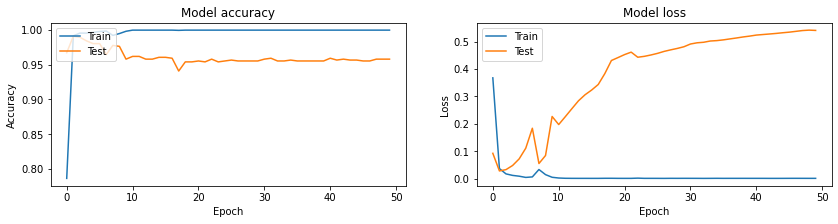

In [91]:
# Plot training & validation accuracy values
plt.figure(figsize=(14,3))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

In [20]:
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords

from nltk.tokenize import word_tokenize 

data = []

for i in range(dataset.shape[0]):
    sms = dataset.iloc[i, 1]
    
    # remove non alphabatic characters
    sms = re.sub('[^A-Za-z]', ' ', sms)
    
    # make words lowercase
    sms = sms.lower()
    
    #split message data into words 
    tokenized_sms = word_tokenize(sms) 
    
    # remove stop words and stemming
    sms_processed = []
    for word in tokenized_sms:
        if word not in set(stopwords.words('Turkish')):
            sms_processed.append(word)
    
    
    sms_text = " ".join(sms_processed)
    data.append(sms_text)
      

data

[nltk_data] Downloading package stopwords to C:\Users\Fehmi
[nltk_data]     Çakmak\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['lira',
 'baskanin aksam toplant si fenaymis',
 'bilal yal nlara zaman gidiyoruz',
 'bip mesajlarimi aninda eglenceli gonderiyorum sen hemen kullan http mobiltr co bip',
 'digiturkten firsat size ozel yil sonuna kadar uzeri ulusal hd yayin belgesel spor dizi yetiskin ilk ay lig tv ayda sadece tl hemen arayin',
 'yi dokuz eyl l iyidir ar g r falan kovala',
 'yiyim te ekk rler oturuyoruz nazarda arkada la sen nas ls n ge g rd m seni gelemedim yan n za',
 'kapatam yorun ayarlara girmem laz m',
 'men ye girsem g r n r m',
 'nemli il hocam iyi ak amlar',
 'senin nasil arastirma g revlisi olacak mi',
 'tamam',
 'tamam abi iyi yolculuklar ben hastanede yim bo a karsan g r ruz abi',
 'tamam getircektim att m antaya',
 'tamam hocam',
 'tamam uyar yarn gidelim',
 'tamamdir',
 'pamuk penye percale saten carsaf carsaf takimlarinda indirim agustos son sms iptal a mc mersis madamecoco com',
 'pamuk saten carsafli nevresim takimlari cift k tl tek k tl firsatiyla magazalar madamecoco com iptal a mc y

In [21]:
# creating the feature matrix 
from sklearn.feature_extraction.text import CountVectorizer

matrix = CountVectorizer(max_features=50)
X = matrix.fit_transform(data).toarray()
y = dataset['label'].map( {'Spam': 1, 'Ham': 0} )

In [22]:
# split train and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [23]:
# Create the LSTM Model
model = Sequential()
model.add(Embedding(input_dim=1000, output_dim=64, input_length=50))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 64)            64000     
                                                                 
 lstm (LSTM)                 (None, 100)               66000     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 130,101
Trainable params: 130,101
Non-trainable params: 0
_________________________________________________________________


In [24]:
# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
95/95 [==============================] - 4s 26ms/step - loss: 0.3751 - accuracy: 0.8250 - val_loss: 0.1741 - val_accuracy: 0.9434
Epoch 2/50
95/95 [==============================] - 2s 22ms/step - loss: 0.1541 - accuracy: 0.9507 - val_loss: 0.1123 - val_accuracy: 0.9724
Epoch 3/50
95/95 [==============================] - 2s 23ms/step - loss: 0.1385 - accuracy: 0.9582 - val_loss: 0.1067 - val_accuracy: 0.9697
Epoch 4/50
95/95 [==============================] - 2s 22ms/step - loss: 0.1208 - accuracy: 0.9622 - val_loss: 0.1107 - val_accuracy: 0.9684
Epoch 5/50
95/95 [==============================] - 2s 21ms/step - loss: 0.1060 - accuracy: 0.9648 - val_loss: 0.1214 - val_accuracy: 0.9618
Epoch 6/50
95/95 [==============================] - 2s 21ms/step - loss: 0.1028 - accuracy: 0.9628 - val_loss: 0.1086 - val_accuracy: 0.9658
Epoch 7/50
95/95 [==============================] - 2s 21ms/step - loss: 0.1017 - accuracy: 0.9658 - val_loss: 0.1058 - val_accuracy: 0.9724
Epoch 8/50
95

In [25]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
print("Training Loss: {:.4f}".format(loss))

loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
print("Testing Loss:  {:.4f}".format(loss))

Training Accuracy: 0.9805
Training Loss: 0.0695
Testing Accuracy:  0.9769
Testing Loss:  0.0884


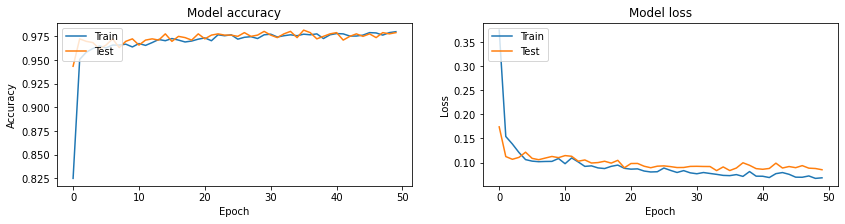

In [26]:
# Plot training & validation accuracy values

plt.figure(figsize=(14,3))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()